In [1]:
!pip install -U scikit-learn
import matplotlib.pyplot as plt 
%matplotlib inline 
import numpy as np 
from sklearn.cluster import KMeans
import pandas as pd

In [2]:
import random

In [3]:
df = pd.read_csv('CPb_2020.csv')
df

,Country (or dependency),Population,Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
0,China,1440297825,0.39 %,5540090,153,9388211,-348399.0,1.7,38,61 %,18.47 %
1,India,1382345085,0.99 %,13586631,464,2973190,-532687.0,2.2,28,35 %,17.70 %
2,United States,331341050,0.59 %,1937734,36,9147420,954806.0,1.8,38,83 %,4.25 %
3,Indonesia,274021604,1.07 %,2898047,151,1811570,-98955.0,2.3,30,56 %,3.51 %
4,Pakistan,221612785,2.00 %,4327022,287,770880,-233379.0,3.6,23,35 %,2.83 %
...,...,...,...,...,...,...,...,...,...,...,...
230,Montserrat,4993,0.06 %,3,50,100,NaN,N.A.,N.A.,10 %,0.00 %
231,Falkland Islands,3497,3.05 %,103,0,12170,NaN,N.A.,N.A.,66 %,0.00 %
232,Niue,1628,0.68 %,11,6,260,NaN,N.A.,N.A.,46 %,0.00 %
233,Tokelau,1360,1.27 %,17,136,10,NaN,N.A.,N.A.,0 %,0.00 %


In [4]:
df2 = df[['Population', 'Land Area (Km²)']]
df2

,Population,Land Area (Km²)
0,1440297825,9388211
1,1382345085,2973190
2,331341050,9147420
3,274021604,1811570
4,221612785,770880
...,...,...
230,4993,100
231,3497,12170
232,1628,260
233,1360,10


In [5]:
X = df2.to_numpy()
X

array([[1440297825,    9388211],
       [1382345085,    2973190],
       [ 331341050,    9147420],
       [ 274021604,    1811570],
       [ 221612785,     770880],
       [ 212821986,    8358140],
       [ 206984347,     910770],
       [ 164972348,     130170],
       [ 145945524,   16376870],
       [ 129166028,    1943950],
       [ 126407422,     364555],
       [ 115434444,    1000000],
       [ 109830324,     298170],
       [ 102659126,     995450],
       [  97490013,     310070],
       [  90003954,    2267050],
       [  84495243,     769630],
       [  84176929,    1628550],
       [  83830972,     348560],
       [  69830779,     510890],
       [  67948282,     241930],
       [  65298930,     547557],
       [  60446035,     294140],
       [  60012400,     885800],
       [  59436725,    1213090],
       [  54473253,     653290],
       [  53968739,     569140],
       [  51276977,      97230],
       [  50976248,    1109500],
       [  46757980,     498800],
       [  

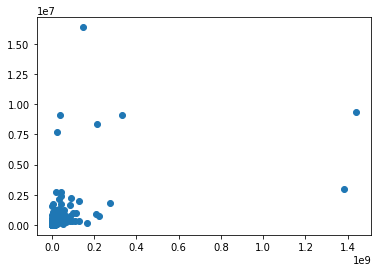

In [6]:
plt.scatter(X[:,0],X[:,1])

In [7]:
a1 = np.max(X[:,0])
b1 = np.min(X[:,0])
c1= np.mean(X[:,0])
e1 = np.std(X[:,0])
d1 = np.median(X[:,0])
print("min=", b1 , "max=", a1, "mean=", c1, "median=", d1, "SD=", e1)

min= 801 max= 1440297825 mean= 33227444.280851062 median= 5460109.0 SD= 135015251.93245462


In [8]:
a2 = np.max(X[:,1])
b2 = np.min(X[:,1])
c2= np.mean(X[:,1])
e2 = np.std(X[:,1])
d2 = np.median(X[:,1])
print("min=",  b2 , "max=", a2, "mean=", c2, "median=", d2, "SD=", e2)

min= 0 max= 16376870 mean= 553591.8425531915 median= 77240.0 SD= 1684201.1062568373


In [18]:
x1 = X[:,0]
x2 = X[:,1]
s = abs(x2-x1)
max_s = np.max(s)
max_s #максимальное из вертикальной и горизонтальной разницы

1430909614

In [9]:
from sklearn import preprocessing #данные лучше нормализовать, поскольку очень большой диапазон значений

In [10]:
normalized_var1 = preprocessing.normalize([X[:,0]])
normalized_var1 #данные нормализованы так, чтобы их значения были от 0 до 1

array([[6.75719904e-01, 6.48531208e-01, 1.55449615e-01, 1.28558031e-01,
        1.03970281e-01, 9.98460523e-02, 9.71073070e-02, 7.73972558e-02,
        6.84707661e-02, 6.05986169e-02, 5.93044089e-02, 5.41564044e-02,
        5.15272152e-02, 4.81628269e-02, 4.57377225e-02, 4.22256162e-02,
        3.96411885e-02, 3.94918505e-02, 3.93295438e-02, 3.27613126e-02,
        3.18781337e-02, 3.06351825e-02, 2.83584327e-02, 2.81549916e-02,
        2.78849120e-02, 2.55562847e-02, 2.53195905e-02, 2.40567426e-02,
        2.39156547e-02, 2.19366420e-02, 2.15692723e-02, 2.12373551e-02,
        2.06354882e-02, 2.06517650e-02, 2.04956844e-02, 1.89410027e-02,
        1.83318119e-02, 1.77523963e-02, 1.77337015e-02, 1.73519128e-02,
        1.63762240e-02, 1.57409356e-02, 1.55056024e-02, 1.54970938e-02,
        1.52178953e-02, 1.47308433e-02, 1.46288574e-02, 1.40443117e-02,
        1.37110855e-02, 1.33340672e-02, 1.30463892e-02, 1.25053095e-02,
        1.24261161e-02, 1.21034824e-02, 1.19871771e-02, 1.142221

In [11]:
normalized_var2 = preprocessing.normalize([X[:,1]])
normalized_var2

array([[3.45443406e-01, 1.09399851e-01, 3.36583394e-01, 6.66575252e-02,
        2.83648730e-02, 3.07541485e-01, 3.35121879e-02, 4.78966314e-03,
        6.02594227e-01, 7.15285062e-02, 1.34139636e-02, 3.67954455e-02,
        1.09712980e-02, 3.66280262e-02, 1.14091638e-02, 8.34171147e-02,
        2.83188787e-02, 5.99232227e-02, 1.28254205e-02, 1.87984251e-02,
        8.90192213e-03, 2.01476037e-02, 1.08230123e-02, 3.25934056e-02,
        4.46361870e-02, 2.40380966e-02, 2.09417598e-02, 3.57762116e-03,
        4.08245468e-02, 1.83535682e-02, 7.35209796e-03, 1.00697728e-01,
        8.76371843e-02, 6.49457275e-02, 2.13163375e-02, 1.59809979e-02,
        2.40222745e-02, 1.12678693e-02, 3.34599751e-01, 1.64218073e-02,
        7.90988012e-02, 1.56527825e-02, 4.70981702e-02, 4.58728819e-02,
        1.20891436e-02, 2.89352024e-02, 8.37243566e-03, 1.94268914e-02,
        5.27462711e-03, 3.24554227e-02, 2.14074062e-02, 1.73935750e-02,
        1.17009517e-02, 4.43053959e-03, 2.82673651e-01, 4.660879

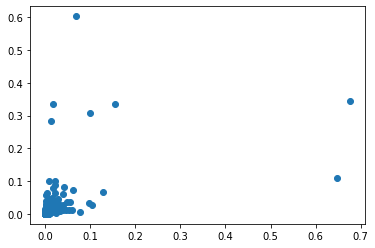

In [12]:
plt.scatter(normalized_var1, normalized_var2)

In [13]:
X2 = np.sort(X)
X3 = X2[13:-1]
X3

array([[   995450, 102659126],
       [   310070,  97490013],
       [  2267050,  90003954],
       [   769630,  84495243],
       [  1628550,  84176929],
       [   348560,  83830972],
       [   510890,  69830779],
       [   241930,  67948282],
       [   547557,  65298930],
       [   294140,  60446035],
       [   885800,  60012400],
       [  1213090,  59436725],
       [   653290,  54473253],
       [   569140,  53968739],
       [    97230,  51276977],
       [  1109500,  50976248],
       [   498800,  46757980],
       [   199810,  45974931],
       [  2736690,  45267449],
       [  2381740,  43984569],
       [  1765048,  44019263],
       [   579320,  43686577],
       [   434320,  40372771],
       [   652860,  39074280],
       [   306230,  37839255],
       [  9093510,  37799407],
       [   446300,  36985624],
       [  2149690,  34905942],
       [   425400,  33551824],
       [  1280000,  33050211],
       [  1246700,  33032075],
       [   328550,  32436963],
       [

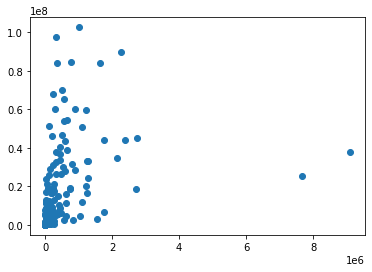

In [14]:
plt.scatter(X3[:,0],X3[:,1])

In [15]:
kmeans = KMeans(n_clusters=4) 
kmeans.fit(X3)
print(kmeans.cluster_centers_)

[[  106021.93125     3393697.09375   ]
 [  853953.05555556 52378121.55555555]
 [ 1016321.         24842600.24324325]
 [ 1053218.33333333 90442706.16666666]]


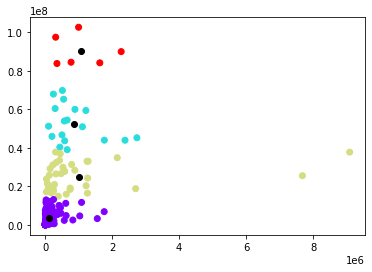

In [16]:
plt.scatter(X3[:,0], X3[:,1], c=kmeans.labels_, cmap='rainbow') 
plt.scatter(kmeans.cluster_centers_[:,0] ,kmeans.cluster_centers_[:,1], color='black')